# Pandas

Pandas è una libreria per la manipolazione di dati in formato *sequenziale o tabellare*, quali serie temporali o dati di microarray.

Caratteristiche principali di Pandas sono:

- **Caricamento** e **salvataggio** di formati standard per dati tabellari, quali *CSV*
  (Comma-separated Values), *TSV* (Tab-separated Values), file *Excel* e formati per
  *database* 

- Semplicità nella esecuzione di operazioni di **indicizzazione** e **aggregazione** di dati

- Semplicità nella esecuzione di operazioni **numeriche** e **statistiche**

- Semplicità nella **visualizzazione** dei risultati delle operazioni

Il sito ufficiale del progetto [http://pandas.pydata.org/](http://pandas.pydata.org/) contiene molte informazioni aggiuntive, documentazione etc. 

Pandas si importa come qualsiasi altro modulo. La sintassi comune è 

In [4]:
import pandas as pd

Dove `as pd` permette di riferirsi al modulo con l'abbreviazione `pd`

# Matplotlib

Matplotlib è una libreria per la realizzazione di grafici estremamente potente e flessibile.

Il modulo `pyplot` della libreria permette di realizzare in maniera semplice moltissimi tipi di plots.

Il modulo si importa di solito rinominandolo `plt`

In [5]:
import matplotlib.pyplot as plt 

Usando `matplotlib.pyplot` si importa solo il modulo `pyplot` della libreria. 

Per le nostre esigenze sarà sufficiente il metodo `plt.show()`.

## Datatypes Pandas 

Pandas fornisce due tipi di dati molto utili, le ``Series`` ed i ``DataFrame``:

- ``Series`` rappresenta dati 1D, come le serie temporali

- ``DataFrame`` rappresenta dati 2D, praticamente qualunque insieme di dati in forma tabellare

Ogni colonna di un ``DataFrame`` è una ``Series``. Per questo questo vedremo prima le ``Series`` e molto di quello che vedremo sarà applicabile anche ai ``DataFrame``.


## ``Series``

Una ``Series`` è un vettore **mono-dimensionale** i cui elementi sono etichettati con un ``index``. 

In questo senso, la ``Series`` opera un po' come una lista (si possono accedere gli elementi in sequenza) e un po' come un dizionario (si può accedere ad un elemento tramite il suo indice, che opera come una chiave e non deve essere per forza numerico)


### Creazione di ``Series``

Una ``Series`` può essere creata tramite la funzione `pd.Series()`:

- Specificando sia dati che indici

In [6]:
s = pd.Series([2.5,3.6,5.7,5.8],index=[0,5,15,30])
s

0     2.5
5     3.6
15    5.7
30    5.8
dtype: float64

- Passando un dizionario (le chiavi diventano gli indici e i valori i dati)

In [7]:
s = pd.Series({"a": 342, "c": 245, "g" : 546, "t" : 222})
s

a    342
c    245
g    546
t    222
dtype: int64

- Passando solo i dati (gli indici saranno sequenziali a partire da 0)

In [9]:
s = pd.Series([2.5,3.6,5.7,5.8])
s

0    2.5
1    3.6
2    5.7
3    5.8
dtype: float64

## Accedere ad una ``Series``

Si può accedere ad una `Series` sia tramite indice (come nei dizionari), 
sia tramite posizione (come nelle liste)

In [10]:
s = pd.Series({"a": 342, "c": 245, "g" : 546, "t" : 222})
s["c"]

245

In [11]:
s[-1]

222

In [ ]:
Gli indici sono praticamente delle etichette associate alle posizioni corrispondenti, 
per cui si possono usare per estrarre porzioni di ``Series``

In [13]:
s["c":"t"]


c    245
g    546
t    222
dtype: int64

In [ ]:
Attenzione: la sottoserie va da indice iniziale a indice finale *compreso*

E' anche possibile passare una lista di indici da estrarre

In [14]:
s[["a", "g"]]

a    342
g    546
dtype: int64

### Operazioni su ``Series``

Le operazioni aritmetiche su una ``Series`` si applicano a tutti i suoi elementi (tale operazione viene detta *broadcasting*)

In [16]:
print(s)
print(s + 1)

a    342
c    245
g    546
t    222
dtype: int64
a    343
c    246
g    547
t    223
dtype: int64


In [17]:
s *= 2
s

a     684
c     490
g    1092
t     444
dtype: int64

E' ovviamente sempre possibile eseguire un'operazione su un solo elemento riferendosi ad esso per posizione o indice

In [18]:
s['c'] += 1
s

a     684
c     491
g    1092
t     444
dtype: int64

Anche i *test logici* si applicano a tutti gli elementi

In [19]:
s > 1000

a    False
c    False
g     True
t    False
dtype: bool

Il risultato è una ``Series`` con come valori ``True`` dove la condizione è soddisfatta, ``False`` dove non lo è.

Queste serie vengono chiamate *maschere* e permettono di scegliere solo gli elementi che soddisfano la condizione

In [20]:
s[s > 1000]

g    1092
dtype: int64

o che non la soddisfano (utile quando non è facile invertire la condizione)

In [21]:
s[~(s > 1000)]

a    684
c    491
t    444
dtype: int64

La somma tra due serie le somma elemento per elemento, allineandole per indice.

In [22]:
s + pd.Series({"a" : 1234, "g" : 3451})

a    1918.0
c       NaN
g    4543.0
t       NaN
dtype: float64

Se un indice non è presente in una delle serie, il risultato è `Nan` (not a number).

Usando il metodo ``add`` è possibile specificare un valore di default da usare quando un indice non è presente

In [24]:
print(s)
s1 = pd.Series({"a" : 1234, "g" : 3451})
s.add(s1, fill_value=0)

a     684
c     491
g    1092
t     444
dtype: int64


a    1918.0
c     491.0
g    4543.0
t     444.0
dtype: float64

### Statistiche con `Series`

- Somma e prodotto di tutti gli elementi 

In [25]:
s.sum()

2711

In [26]:
s.product()

162833291712

- Massimo (o minimo) tra gli elementi, ed indice corrispondente

In [27]:
s.max()

1092

In [28]:
s.argmax()

'g'

- Media, deviazione standard (e molte altre)

In [29]:
s.mean()

677.75

In [30]:
s.std()

295.04618282567225

- Vari tipi di correlazione (tra una o più serie)

In [31]:
s.corr(s) # pearson di default

0.99999999999999978

In [32]:
s.corr(s, method='spearman')

1.0

- conteggi di occorrenze dei valori 

In [33]:
s = pd.Series([1,2,1,1,1,2,3,4,4,4,2,3,4,3,1,1,2])

s.value_counts()

1    6
4    4
2    4
3    3
dtype: int64

### Grafici con `Series`

E' possibile visualizzare il contenuto di una serie o il risultato di operazioni eseguite su serie tramite la libreria `matplotlib`

In [34]:
import matplotlib.pyplot as plt

- Utilizzando un *line plot* (il default)

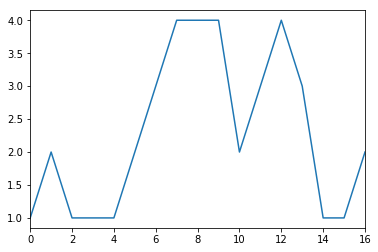

In [35]:
s.plot()
plt.show()

- Utilizzando un *bar plot*

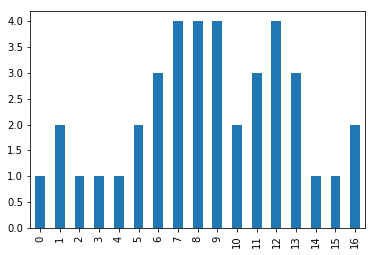

In [36]:
s.plot(kind='bar')
plt.show()

E in molti altri modi: [http://pandas.pydata.org/pandas-docs/stable/visualization.html](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

In [ ]:
Per salvare il plot su file usare il metodo `savefig` di `pyplot`

In [37]:
s.plot(kind='bar')
plt.savefig("bar.png")

## `DataFrame`

Un ``DataFrame`` è praticamente una **tabella** di oggetti eterogenei.
In pratica è l'equivalente bi-dimensionale di una `Series`.

Un ``DataFrame`` ha indici sia per le righe che per le colonne:

- ``index`` rappresenta le etichette delle **righe**

- ``columns`` rappresenta le etichette delle **colonne**

In aggiunta, l'attributo ``shape`` descrive le **dimensioni** della tabella

Ogni colonna di un ``DataFrame`` è una  ``Series``. Tutte le operazioni viste per le serie
possono essere applicate a colonne estratte da un  ``DataFrame``.

Inoltre molte delle operazioni definite per le ``Series`` possono essere applicate direttamente su un ``DataFrame``

|

### Creazione di  `DataFrame`

Ci sono molti modi per creare un `DataFrame`. I più semplici sono:

- Da un dizionario di liste

In [40]:
d = {'cond1' : [0.5,-0.4,1.2,-2.1,2.3], 'cond2' : [0.6,-0.1,-0.1,-0.9,1.8]}
df = pd.DataFrame(d, index=['gene1','gene2','gene3','gene4','gene5'])
print(df)
df = pd.DataFrame(d)
df

       cond1  cond2
gene1    0.5    0.6
gene2   -0.4   -0.1
gene3    1.2   -0.1
gene4   -2.1   -0.9
gene5    2.3    1.8


cond1  cond2
0    0.5    0.6
1   -0.4   -0.1
2    1.2   -0.1
3   -2.1   -0.9
4    2.3    1.8

- Da un file in formato tabellare (e.g. CSV)

In [42]:
df = pd.read_csv('breast_cancer.txt', delimiter='\t')
df

METABRIC_ID  age_at_diagnosis last_follow_up_status  \
0       MB-0002             43.19                     a   
1       MB-0008             76.97                d-d.s.   
2       MB-0010             78.77                d-d.s.   
3       MB-0035             84.22                     d   
4       MB-0036             85.49                     a   
5       MB-0050             44.64                     a   
6       MB-0059             75.58                     a   
7       MB-0060             45.43                     a   
8       MB-0066             61.49                     a   
9       MB-0101             46.89                     a   
10      MB-0102             51.38                     a   
11      MB-0106             49.87                     a   
12      MB-0112             83.89                d-d.s.   
13      MB-0115             39.84                d-d.s.   
14      MB-0117             60.07                     a   
15      MB-0119             82.73                     a   
16      MB-0120             72.10                d-o.c.   
17      MB-0121             78.73                     a   
18      MB-0122             58.95                     a   
19      MB-0123             76.89                     a   
20      MB-0126             61.95                     a   
21      MB-0131             69.16                d-d.s.   
22      MB-0133             58.89                     a   
23      MB-0135             74.09                     a   
24      MB-0136             72.30                     a   
25      MB-0138             51.33                     a   
26      MB-0139             47.62                     a   
27      MB-0140             74.07                     a   
28      MB-0142             57.99                     a   
29      MB-0143             85.39                d-o.c.   
..          ...               ...                   ...   
769     MB-5179             68.60                     a   
770     MB-5182             78.04                d-o.c.   
771     MB-5183             74.34                d-o.c.   
772     MB-5184             79.76                d-o.c.   
773     MB-5185             61.88                d-d.s.   
774     MB-5188             65.44                d-d.s.   
775     MB-5189             69.24                d-d.s.   
776     MB-5193             88.80                d-o.c.   
777     MB-5195             72.16                     a   
778     MB-5196             52.98                d-d.s.   
779     MB-5197             62.11                     a   
780     MB-5200             70.23                d-d.s.   
781     MB-5201             73.17                d-o.c.   
782     MB-5205             50.24                     a   
783     MB-5206             67.45                     a   
784     MB-5209             79.17                     a   
785     MB-5211             68.42                     a   
786     MB-5212             80.17                     a   
787     MB-5213             74.98                d-d.s.   
788     MB-5215             74.11                d-d.s.   
789     MB-5218             42.11                     a   
790     MB-5219             55.77                     a   
791     MB-5221             63.53                d-o.c.   
792     MB-5222             76.20                d-o.c.   
793     MB-5223             42.05                d-d.s.   
794     MB-5224             90.23                d-d.s.   
795     MB-5226             75.53                     a   
796     MB-5227             74.46                     a   
797     MB-5228             72.56                     a   
798     MB-5229             39.99                d-d.s.   

    menopausal_status_inferred  group  grade   size  stage  \
0                          pre      4      3   10.0      1   
1                         post      4      3   40.0      2   
2                         post      4      3   31.0      4   
3                         post      4      2   28.0      2   
4                         post     

In [43]:
list(df.index)


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [44]:
df.columns

Index(['METABRIC_ID', 'age_at_diagnosis', 'last_follow_up_status',
       'menopausal_status_inferred', 'group', 'grade', 'size', 'stage',
       'lymph_nodes_positive', 'lymph_nodes_removed', 'NPI',
       'histological_type', 'ER_IHC_status', 'HER2_IHC_status',
       'HER2_SNP6_state', 'cellularity', 'P53_mutation_status',
       'P53_mutation_type', 'P53_mutation_details', 'Pam50Subtype',
       'IntClustMemb', 'Treatment', 'Site', 'Genefu', 'ER.Expr', 'Her2.Expr',
       'PR.Expr', 'T'],
      dtype='object')

In [45]:
df.shape

(799, 28)

File excel possono essere letti con `read_excel`

E' possibile accedere ad un estratto del `DataFrame` con il metodo `head`

In [46]:
df.head()

METABRIC_ID  age_at_diagnosis last_follow_up_status  \
0     MB-0002             43.19                     a   
1     MB-0008             76.97                d-d.s.   
2     MB-0010             78.77                d-d.s.   
3     MB-0035             84.22                     d   
4     MB-0036             85.49                     a   

  menopausal_status_inferred  group  grade  size  stage  lymph_nodes_positive  \
0                        pre      4      3  10.0      1                     0   
1                       post      4      3  40.0      2                     8   
2                       post      4      3  31.0      4                     0   
3                       post      4      2  28.0      2                     0   
4                       post      4      2  22.0      4                     0   

  lymph_nodes_removed   ...    \
0                  25   ...     
1                   8   ...     
2                  14   ...     
3                  16   ...     
4                  23   ...     

                                P53_mutation_details Pam50Subtype  \
0  MB-AD-0002+ex5,6+chr17:7519122+12521A>AC+178H>...         LumA   
1                                                NaN         LumB   
2                                                NaN         LumB   
3                                                NaN         Her2   
4                                                NaN         LumA   

  IntClustMemb Treatment Site                 Genefu ER.Expr Her2.Expr  \
0            4     HT/RT    1  ER+/HER2-_High_Prolif       +         -   
1            9  CT/HT/RT    1  ER+/HER2-_High_Prolif       +         -   
2            7     HT/RT    1  ER+/HER2-_High_Prolif       +         -   
3            3      NONE    1  ER+/HER2-_High_Prolif       +         -   
4            3     HT/RT    1   ER+/HER2-_Low_Prolif       +         -   

  PR.Expr       T  
0       +  1484.0  
1       +  1241.0  
2       +   234.0  
3       -  1088.0  
4       +  2314.0  

[5 rows x 28 columns]

### Estrazione di righe e colonne

- Estrazione di colonne tramite indici di colonna

In [47]:
df['age_at_diagnosis']

0      43.19
1      76.97
2      78.77
3      84.22
4      85.49
5      44.64
6      75.58
7      45.43
8      61.49
9      46.89
10     51.38
11     49.87
12     83.89
13     39.84
14     60.07
15     82.73
16     72.10
17     78.73
18     58.95
19     76.89
20     61.95
21     69.16
22     58.89
23     74.09
24     72.30
25     51.33
26     47.62
27     74.07
28     57.99
29     85.39
       ...  
769    68.60
770    78.04
771    74.34
772    79.76
773    61.88
774    65.44
775    69.24
776    88.80
777    72.16
778    52.98
779    62.11
780    70.23
781    73.17
782    50.24
783    67.45
784    79.17
785    68.42
786    80.17
787    74.98
788    74.11
789    42.11
790    55.77
791    63.53
792    76.20
793    42.05
794    90.23
795    75.53
796    74.46
797    72.56
798    39.99
Name: age_at_diagnosis, Length: 799, dtype: float64

In [48]:
df[['Pam50Subtype','stage']]

Pam50Subtype  stage
0           LumA      1
1           LumB      2
2           LumB      4
3           Her2      2
4           LumA      4
5         Normal      2
6           LumA      1
7           LumB      2
8           LumB      2
9         Normal      2
10          LumB      2
11          LumA      3
12          LumA      3
13         Basal      2
14          LumA      2
15          LumB      2
16          LumB      2
17          LumA      2
18          LumA      2
19          LumB      2
20          LumA      2
21          LumA      2
22          LumA      2
23          LumB      2
24          LumA      1
25          LumA      1
26          LumA      2
27          LumB      2
28          LumA      1
29          LumA      2
..           ...    ...
769         LumA      0
770         LumA      0
771         LumA      0
772         LumA      0
773         LumA      0
774        Basal      0
775         LumA      0
776         LumA      0
777         LumA      0
778         LumA      0
779         LumA      0
780         LumB      0
781         LumA      0
782        Basal      0
783         LumA      0
784        Basal      0
785         LumB      0
786         LumB      0
787         Her2      0
788         LumB      0
789         LumB      0
790         LumA      0
791         LumA      0
792         Her2      0
793        Basal      0
794         LumA      0
795         LumB      0
796         LumA      0
797         LumB      0
798        Basal      0

[799 rows x 2 columns]

- Estrazione di righe tramite indici di riga

In [49]:
df.loc[0]

METABRIC_ID                                                             MB-0002
age_at_diagnosis                                                          43.19
last_follow_up_status                                                         a
menopausal_status_inferred                                                  pre
group                                                                         4
grade                                                                         3
size                                                                         10
stage                                                                         1
lymph_nodes_positive                                                          0
lymph_nodes_removed                                                          25
NPI                                                                        4.02
histological_type                                                           IDC
ER_IHC_status                           

In [50]:
df.loc[[0,5,15]]

METABRIC_ID  age_at_diagnosis last_follow_up_status  \
0      MB-0002             43.19                     a   
5      MB-0050             44.64                     a   
15     MB-0119             82.73                     a   

   menopausal_status_inferred  group  grade  size  stage  \
0                         pre      4      3  10.0      1   
5                         pre      4      2  33.0      2   
15                       post      4      2  23.0      2   

    lymph_nodes_positive lymph_nodes_removed   ...    \
0                      0                  25   ...     
5                      3                  17   ...     
15                     1                  17   ...     

                                 P53_mutation_details Pam50Subtype  \
0   MB-AD-0002+ex5,6+chr17:7519122+12521A>AC+178H>...         LumA   
5   MB-AD-0050+ex5,6+chr17:7519122+12521A>AC+178H>...       Normal   
15                                                NaN         LumB   

   IntClustMemb Treatment Site                 Genefu ER.Expr Her2.Expr  \
0             4     HT/RT    1  ER+/HER2-_High_Prolif       +         -   
5             8  CT/HT/RT    1   ER+/HER2-_Low_Prolif       +         -   
15            7     HT/RT    1  ER+/HER2-_High_Prolif       +         -   

   PR.Expr       T  
0        +  1484.0  
5        +  1784.0  
15       -   364.0  

[3 rows x 28 columns]

- Estrazione di righe tramite posizioni di riga (ultimo valore escluso)

In [55]:
df[0:5] 
df.loc[0:5]

METABRIC_ID  age_at_diagnosis last_follow_up_status  \
0     MB-0002             43.19                     a   
1     MB-0008             76.97                d-d.s.   
2     MB-0010             78.77                d-d.s.   
3     MB-0035             84.22                     d   
4     MB-0036             85.49                     a   
5     MB-0050             44.64                     a   

  menopausal_status_inferred  group  grade  size  stage  lymph_nodes_positive  \
0                        pre      4      3  10.0      1                     0   
1                       post      4      3  40.0      2                     8   
2                       post      4      3  31.0      4                     0   
3                       post      4      2  28.0      2                     0   
4                       post      4      2  22.0      4                     0   
5                        pre      4      2  33.0      2                     3   

  lymph_nodes_removed   ...    \
0                  25   ...     
1                   8   ...     
2                  14   ...     
3                  16   ...     
4                  23   ...     
5                  17   ...     

                                P53_mutation_details Pam50Subtype  \
0  MB-AD-0002+ex5,6+chr17:7519122+12521A>AC+178H>...         LumA   
1                                                NaN         LumB   
2                                                NaN         LumB   
3                                                NaN         Her2   
4                                                NaN         LumA   
5  MB-AD-0050+ex5,6+chr17:7519122+12521A>AC+178H>...       Normal   

  IntClustMemb Treatment Site                 Genefu ER.Expr Her2.Expr  \
0            4     HT/RT    1  ER+/HER2-_High_Prolif       +         -   
1            9  CT/HT/RT    1  ER+/HER2-_High_Prolif       +         -   
2            7     HT/RT    1  ER+/HER2-_High_Prolif       +         -   
3            3      NONE    1  ER+/HER2-_High_Prolif       +         -   
4            3     HT/RT    1   ER+/HER2-_Low_Prolif       +         -   
5            8  CT/HT/RT    1   ER+/HER2-_Low_Prolif       +         -   

  PR.Expr       T  
0       +  1484.0  
1       +  1241.0  
2       +   234.0  
3       -  1088.0  
4       +  2314.0  
5       +  1784.0  

[6 rows x 28 columns]

### Operazioni su `DataFrame`

Le operazioni sulle `Series` si applicano in maniera analoga ai `DataFrame` 

In [56]:
df[df['stage'] > 1]

METABRIC_ID  age_at_diagnosis last_follow_up_status  \
1       MB-0008             76.97                d-d.s.   
2       MB-0010             78.77                d-d.s.   
3       MB-0035             84.22                     d   
4       MB-0036             85.49                     a   
5       MB-0050             44.64                     a   
7       MB-0060             45.43                     a   
8       MB-0066             61.49                     a   
9       MB-0101             46.89                     a   
10      MB-0102             51.38                     a   
11      MB-0106             49.87                     a   
12      MB-0112             83.89                d-d.s.   
13      MB-0115             39.84                d-d.s.   
14      MB-0117             60.07                     a   
15      MB-0119             82.73                     a   
16      MB-0120             72.10                d-o.c.   
17      MB-0121             78.73                     a   
18      MB-0122             58.95                     a   
19      MB-0123             76.89                     a   
20      MB-0126             61.95                     a   
21      MB-0131             69.16                d-d.s.   
22      MB-0133             58.89                     a   
23      MB-0135             74.09                     a   
26      MB-0139             47.62                     a   
27      MB-0140             74.07                     a   
29      MB-0143             85.39                d-o.c.   
32      MB-0146             81.00                     a   
34      MB-0150             70.22                     a   
35      MB-0151             67.70                d-d.s.   
39      MB-0157             71.50                     a   
40      MB-0158             53.78                     a   
..          ...               ...                   ...   
454     MB-3277             29.92                d-d.s.   
458     MB-3303             63.96                     a   
459     MB-3328             69.65                     a   
464     MB-3355             48.53                   NaN   
468     MB-3365             51.18                     a   
474     MB-3386             40.06                d-d.s.   
475     MB-3388             59.30                     a   
478     MB-3403             50.92                     a   
479     MB-3412             55.28                     a   
480     MB-3429             49.08                     a   
481     MB-3430             68.86                     a   
483     MB-3439             43.67                     a   
486     MB-3453             51.36                d-d.s.   
488     MB-3467             21.93                d-d.s.   
489     MB-3470             56.40                   NaN   
491     MB-3479             60.30                     a   
493     MB-3488             41.10                d-d.s.   
495     MB-3492             62.09                d-d.s.   
496     MB-3497             53.50                d-d.s.   
497     MB-3502             50.79                     a   
498     MB-3506             39.28                     a   
499     MB-3525             65.56                     a   
501     MB-3548             66.85                     a   
502     MB-3556             51.76                   NaN   
503     MB-3567             55.95                     a   
504     MB-3600             60.15                     a   
506     MB-3702             37.16                     a   
508     MB-3707             70.77                     a   
516     MB-3842             54.60                     a   
522     MB-3871             62.03                   NaN   

    menopausal_status_inferred  group  grade   size  stage  \
1                         post      4      3   40.0      2   
2                         post      4      3   31.0      4   
3                         post      4      2   28.0      2   
4                         post      4      2   22.0      4   
5                          pre     

In [57]:
df[df['stage'] > 1][['Pam50Subtype','stage']]

Pam50Subtype  stage
1           LumB      2
2           LumB      4
3           Her2      2
4           LumA      4
5         Normal      2
7           LumB      2
8           LumB      2
9         Normal      2
10          LumB      2
11          LumA      3
12          LumA      3
13         Basal      2
14          LumA      2
15          LumB      2
16          LumB      2
17          LumA      2
18          LumA      2
19          LumB      2
20          LumA      2
21          LumA      2
22          LumA      2
23          LumB      2
26          LumA      2
27          LumB      2
29          LumA      2
32          LumB      2
34         Basal      2
35          LumB      3
39         Basal      2
40         Basal      2
..           ...    ...
454        Basal      2
458         LumB      2
459         LumA      2
464         Her2      3
468         LumA      2
474         Her2      2
475         LumB      2
478         LumA      2
479         LumA      3
480       Normal      2
481         LumA      2
483         LumA      2
486        Basal      2
488         Her2      3
489         Her2      2
491       Normal      2
493         Her2      2
495         LumB      2
496         Her2      3
497        Basal      2
498         LumB      2
499         LumB      3
501         LumA      2
502         Her2      2
503        Basal      2
504         LumB      2
506        Basal      2
508         LumA      2
516         LumB      2
522         LumA      2

[332 rows x 2 columns]

Le statistiche si possono applicare a singole colonne o all'intera tabella

In [58]:
df['age_at_diagnosis'].mean()

60.153404255319096

In [59]:
df.mean()

age_at_diagnosis          60.153404
group                      2.506884
grade                      2.444305
size                      26.075720
stage                      1.138924
lymph_nodes_positive       1.929912
NPI                        4.162178
IntClustMemb               5.516896
Site                       1.946183
T                       2808.654135
dtype: float64

In [60]:
df.std()

age_at_diagnosis          13.002036
group                      1.295700
grade                      0.640402
size                      15.474155
stage                      1.000989
lymph_nodes_positive       3.958126
NPI                        1.079543
IntClustMemb               2.685131
Site                       0.860353
T                       1755.920966
dtype: float64

### Raggruppare righe

E' possibile raggruppare righe in base ad il valore di una certa colonna. In tal modo è possibile calcolare statistiche stratificate 

In [61]:
df.groupby('Pam50Subtype').mean()

age_at_diagnosis     group     grade       size     stage  \
Pam50Subtype                                                              
Basal                52.705909  2.840909  2.954545  26.539773  1.215909   
Her2                 57.585821  2.537313  2.850746  32.373134  1.149254   
LumA                 60.841333  2.360000  2.173333  23.664000  1.018667   
LumB                 63.743860  2.497674  2.604651  27.720930  1.237209   
Normal               56.403148  2.981481  2.351852  27.703704  1.444444   

              lymph_nodes_positive       NPI  IntClustMemb      Site  \
Pam50Subtype                                                           
Basal                     1.636364  4.666591      8.068182  1.977273   
Her2                      3.432836  4.915522      5.014925  2.119403   
LumA                      1.282667  3.759093      5.381333  1.992000   
LumB                      2.627907  4.446140      5.148837  1.888372   
Normal                    2.259259  4.074074      4.388889  1.592593   

                        T  
Pam50Subtype               
Basal         2459.454545  
Her2          2430.000000  
LumA          3093.360000  
LumB          2695.865116  
Normal        2312.462963

In [62]:
df.groupby('Treatment')['size'].mean()

Treatment
CT          23.470588
CT/HT       22.692308
CT/HT/RT    35.000000
CT/RT       31.621429
HT          25.021739
HT/RT       25.483395
NONE        23.784314
RT          20.326531
Name: size, dtype: float64

E' possibile applicare funzioni arbitrarie ad un DataFrame (o ad una sua parte) tramite il metodo `apply` che prende come argomento la funzione da applicare.

In [63]:
df.groupby('Pam50Subtype')['stage'].apply(pd.Series.value_counts)

Pam50Subtype   
Basal         2     34
              0     29
              1     18
              3      7
Her2          0     28
              2     18
              1     11
              3     10
LumA          0    145
              2    122
              1     94
              3     12
              4      2
LumB          2     81
              0     67
              1     51
              3     11
              4      5
Normal        2     25
              0     13
              1     11
              3      3
              4      2
Name: stage, dtype: int64